In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as web
# Pull NIFTY data from Yahoo finance
rel = web.DataReader('RELIANCE.NS',data_source='yahoo',start='08/06/2019', end='08/06/2020')
ada = web.DataReader('ADANIENT.NS',data_source='yahoo',start='08/06/2019', end='08/06/2020')
# Compute the logarithmic returns using the closing price 
#returns = (rel['Close'] -rel['Close'].shift(1))/ rel['Close'].shift(1)
#volatility = returns.std()
#sharpe_ratio1 = (returns.mean() - 0.05/252) / volatility
#sharpe_ratio1*np.sqrt(252)

In [4]:
# calculaet annualized sharpe ratio of reliance
R=rel['Close']
r = (R - R.shift(1))/R.shift(1)# return over 1 period
sr = (r.mean()-0.05/252)/r.std() * np.sqrt(252)
sr
A=ada['Close']
a=(A-A.shift(1))/A.shift(1)
sa=(a.mean()-0.05/252)/a.std()*np.sqrt(252)

In [5]:
import matplotlib.pyplot as plt

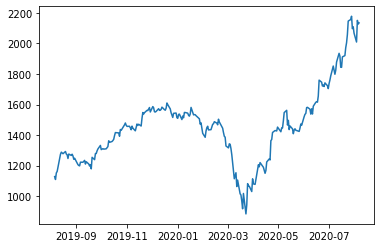

In [6]:
plt.plot(rel['Close'])

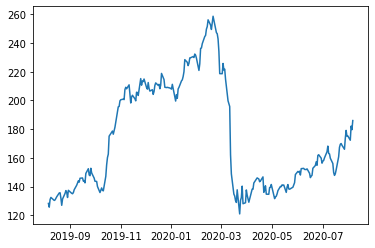

In [7]:
plt.plot(ada['Close'])

In [8]:
cov_mat=np.cov(r[1:],a[1:])
cov_mat=cov_mat*251

In [90]:
mean_rets=[np.mean(a)*251,np.mean(r)*251]

In [96]:
ar=np.random.rand(100,2)
wt=pd.DataFrame(ar,columns=['a','r'])
wt=wt.loc[:,:].div(wt.sum(axis=1),axis=0)
sr=np.zeros(100)

In [97]:
#rets calculate the expected return for a perticular proportion of assets 
rets=np.dot(wt,mean_rets)

In [98]:
#we now need to calculaet the risk associated with the combination of the two assets .
prisk=np.zeros(100)
for i in range(len(ar)):
    prisk[i]=np.sqrt(np.dot(np.dot(wt.iloc[i,:],cov_mat),np.transpose(wt.iloc[i,:])))
    sr=(rets-5/251)/prisk
results=pd.DataFrame([rets,prisk,sr])
results=results.transpose()
results.columns=["rets","risk","sr"]
results

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


,rets,risk,sr
0,0.700479,0.435114,1.564094
1,0.664966,0.418729,1.540486
2,0.637911,0.413095,1.496002
3,0.545375,0.440071,1.194022
4,0.654876,0.415911,1.526661
...,...,...,...
95,0.693441,0.431097,1.562343
96,0.620164,0.412770,1.454184
97,0.714715,0.444332,1.563684
98,0.638263,0.413129,1.496731


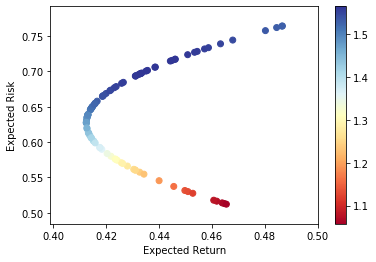

In [99]:
plt.scatter(results.risk,results.rets,c=results.sr,cmap='RdYlBu')
plt.xlabel("Expected Return")
plt.ylabel("Expected Risk")
plt.colorbar()
